# 1. Giới thiệu
* Là một thuật toán thuộc nhóm Supervised Learning dc sử dụng cho cả classification và regression.
* Decision tree dc sử dụng để phát triển các model dự đoán và phân loại trong nh lĩnh vực khác nhau như:
  * Business Management
  * Customer Relationship Management
  * Fraudulent Statemant Detection
  * Engineering
  * Energy Consumption
  * Fault Diagnosis
  * Healthcare Management
  * Agriculture
  * ...
* Decision Tree thường dc sử dụng trog nghiên cứu hoạt động, đặc biệt trong phân tích quyết định, giúp xác định chiến lược có khả năng đạt dc mục tiêu tốt nhất.

# 2. Thuật toán
* Tìm các tính năng _(feature)_ mô tả có chứa thông tin nhất về target feature và sau đó chia tập dữ liệu dọc theo các giá trị của các feature này sao cho các giá trị target feature cho các tập con _(sub dataset)_ càng thuần khiết càng tốt.

$\Rightarrow$ Các tính năng mô tả dẫn đến target feature thuần thiết nhất dc gọi là có thông tin nhất.

## 2.1. Demo với Gini

In [1]:
import numpy as np
import pandas as pd
from modules.preprocessing import CPreprocessing

In [2]:
X = np.array([["Red", "Sports", "Domestic"],
              ["Red", "Sports", "Domestic"],
              ["Red", "Sports", "Domestic"],               
              ["Yellow", "Sports", "Domestic"],
              ["Yellow", "Sports", "Imported"],              
              ["Yellow", "SUV", "Imported"],               
              ["Yellow", "SUV", "Imported"],               
              ["Yellow", "SUV", "Domestic"],              
              ["Red", "SUV", "Imported"],               
              ["Red", "Sports", "Imported"]])

y = np.array(["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Yes"])

In [3]:
X = pd.DataFrame(X, columns=['color', 'type', 'origin'])
X_now = CPreprocessing(X).encoding()

X_now

,color_Red,color_Yellow,type_SUV,type_Sports,origin_Domestic,origin_Imported
0,1,0,0,1,1,0
1,1,0,0,1,1,0
2,1,0,0,1,1,0
3,0,1,0,1,1,0
4,0,1,0,1,0,1
5,0,1,1,0,0,1
6,0,1,1,0,0,1
7,0,1,1,0,1,0
8,1,0,1,0,0,1
9,1,0,0,1,0,1


In [4]:
y = pd.DataFrame(y, columns=['stolen'])
y_now = CPreprocessing(y).encoding(drop_first=True)

y_now

,stolen_Yes
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,0
9,1


Training model

In [5]:
from modules.decision_tree import CDecisionTree

In [6]:
model = CDecisionTree(X_now, y_now)
model.initModel()

Test khả năng dự đoán của model

In [7]:
X_new = [[1, 0, 1, 0, 1, 0]] #"Red", "SUV", "Domestic"

In [8]:
model.predict(X_new)

array([0], dtype=uint8)

> **Nhận xét**
> * Vậy với tập dữ liệu `Red, SUV, Domestic` thì model dự đoán xe sẽ ko bị mất trộm.

Trực quan hóa

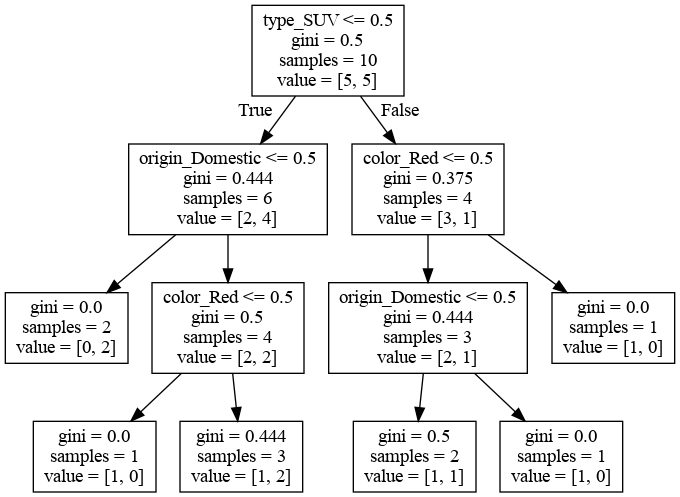

In [9]:
model.visualTree()

## 2.2. Entropy và Information Gain
![](../images/32.png)
* Entropy = 0 $\Rightarrow$ mẫu hoàn toàn thuần khiết.
* Entropy = 1 $\Rightarrow$ mẫu ko thuần thiết.
* Tùy vào số lượng các class trong dataset, entropy có thể lớn hơn 1, tuy nhiên ý nghĩa thì như nhau, entroy càng lớn thì càng ít thuần thiết.

### 2.2.1. Information Gain
* Dựa vào việc giảm entropy sau khi dataset dc phân chia dc trên một thuộc tính.
* Information Gain cao nhất có nghĩa là giảm entropy xuống thấp nhất.

### 2.2.2. Công thức của Entropy
$$Entropy = \Sigma_{i = 1}^C {-p_i * log_2(p_i)} = -\Sigma_{i = 1}^C {p_i * log_2(p_i)}$$
$$Gain(target, features) = Entropy(target) - Entropy(target, features)$$
* Tính Gain cho từng thuộc tính, theo class của kết quả.
* Thuộc tính nào trong nhóm có Gain lớn nhất $\Rightarrow$ chọn thuộc tính đó để chia nhánh cho cây.

### 2.2.3. Tính Gain cho Color
![](../images/33.png)

* Color: |`Red`| = 5, |`Yellow`| = 5
  * (Color = `Red` & Stolen = `Yes`) = $\dfrac{3}{5}$
  * (Color = `Red` & Stolen = `No`) = $\dfrac{2}{5}$
  
  $\Rightarrow Entropy(Red) = -1 * \dfrac{3}{5}*log_2(\dfrac{3}{5}) + \dfrac{2}{5}*log_2({\dfrac{2}{5}}) = 0.971$

  * (Color = `Yellow` & Stolen = `Yes`) = $\dfrac{2}{5}$
  * (Color = `Yellow` & Stolen = `No`) = $\dfrac{3}{5}$
  
  $\Rightarrow Entropy(Yellow) = -1 * \dfrac{2}{5}*log_2(\dfrac{2}{5}) + \dfrac{3}{5}*log_2({\dfrac{3}{5}}) = 0.971$

$\Rightarrow Entropy(Stolen, Color) = \dfrac{5}{10}*Entropy(Red) + \dfrac{5}{10}*Entropy(Yellow) = 0.971$

* $Entropy(target) = -1*(p(yes) * log_2(yes) + p(no)*log_2(no)) = -1*(\dfrac{5}{10}*log_2({\dfrac{5}{10}}) + \dfrac{5}{10}*log_2({\dfrac{5}{10}})) = 1$

$\Rightarrow Gain = Entropy(target) - Entropy(target, features) = 1 - 0.971 = 0.029$

* Làm tương tự cho các thuộc tính còn lại.
* So sánh Information Gain của các thuộc tính $\Rightarrow$ chọn ra thuộc tính có Gain lớn nhất để chia cây.

# 3. Ưu điểm & Khuyết điểm
* Ưu điểm:
  * Ko cần chuẩn hóa các feature.
  * Có thể áp dụng dc cho cả Classification và Regression
  * Có thể áp dụng dc cho các quan hệ phi tuyến.
  * Dùng gini khi các thuộc tính có continous, dùng entropy khi toàn bộ feature là classification.
  * Gini sẽ tối thiểu hóa việc dự đoán lớp sai.
* Khuyết điểm
  * Nếu có các feature liên tục thì cây trở nên rất lớn và khó diễn giải.
  * Những thay đổi nhỏ trong dữ liệu dẫn đến cây hoàn toàn khác $\Rightarrow$ có thể dùng random forest để khắc phục.
  * Nếu số lượng các feature lớn mà số mẫu lại nhỏ thì có thể dẫn đến kết quả bị kém chất lượng.
  * Entropy tính toán chậm hơn gini.

# 4. Demo với Python

Đọc dữ liệu

In [10]:
from modules.file import CPandasFile

In [11]:
iris = CPandasFile().readExcel(r'./data/Iris.xls')

iris

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Tạo ra tập `X` và `y`

In [12]:
X = iris[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
y = iris['iris']

Train model

In [13]:
from modules.decision_tree import CDecisionTree

In [14]:
model = CDecisionTree(X, y)
model.initModel()

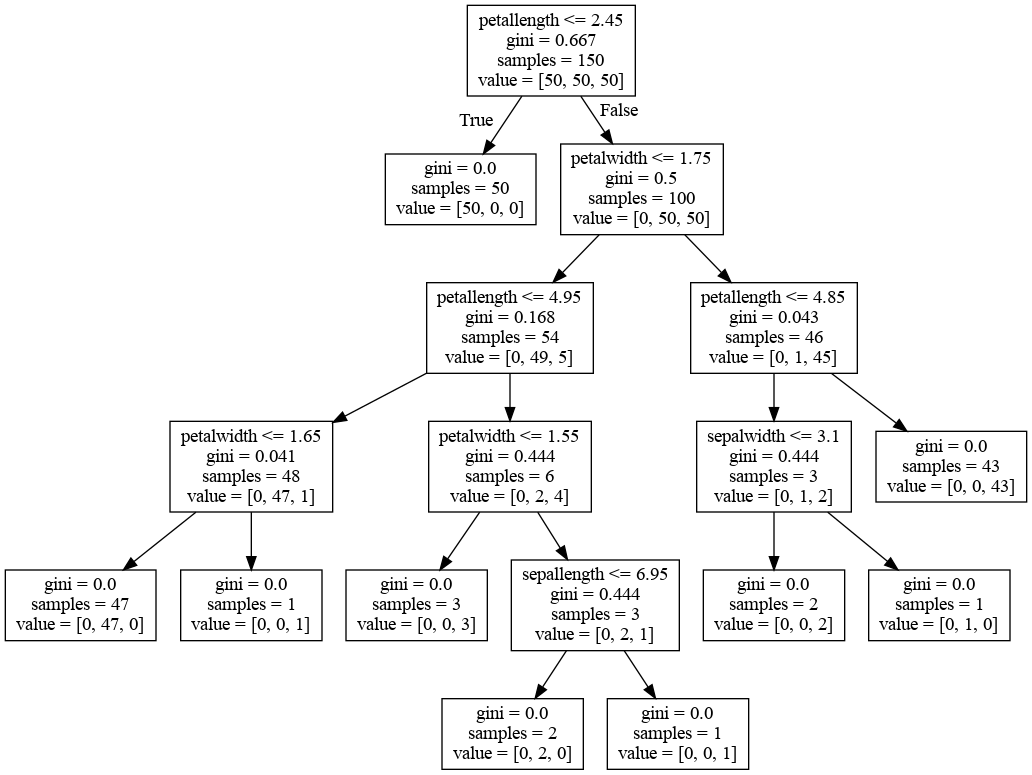

In [15]:
model.visualTree()

In [16]:
model.exportFile('./from_class/tree.pdf')

Done.


In [17]:
model.exportFile('./from_class/tree.png')

Done.


In [18]:
model.exportDotData('./from_class/tree.txt')

Success!


Load file image lên

In [19]:
from modules.file import CImage

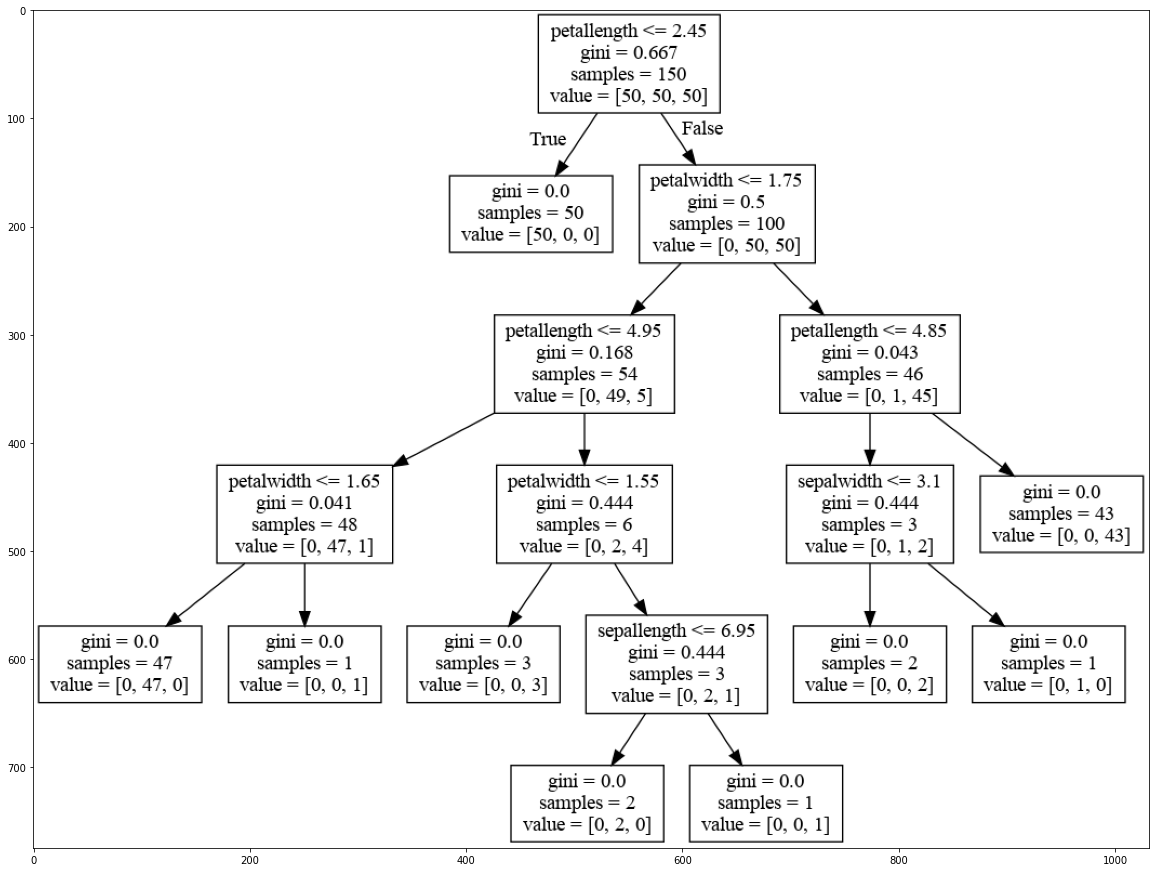

In [20]:
CImage().readImage(r'./from_class/tree.png')

In [21]:
model.model.score(X, y)

1.0

In [22]:
X_new = np.array([
    [4.7, 3.2, 1.3, 0.2],
    [6.6, 3., 4.4, 1.4],
    [5.9, 3., 5.1, 1.8]
])

yhat_new = model.predict(X_new)

yhat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)